Problem Description: https://fivethirtyeight.com/features/how-fast-can-you-type-a-million-letters/

>What is the fastest way to fill up a text editor with a string of 1 million of the same character? (Let’s go with the letter “i”.)

>There are a lot of variables here. You can type “i’s” at a certain rate, maybe around five per second, by simply pressing its key repeatedly. You can also hold down the key, initially getting a single “i,” and then after a “repeat delay” of about half a second, getting a quickly repeating stream of “i’s” at a “repeat rate” of about 30 per second. You can also use copy and paste. If you release the “i” key, you can hit Ctrl+A then Ctrl+C, then hit the right arrow key, and finally Ctrl+V, selecting all your text, copying it and pasting it to what you had already. (Replace Ctrl with Command if on a Mac, of course.) This process costs you about a second from “i” key release to initial depress of Ctrl+V. If you hold down Ctrl+V, there is the same repeat delay and repeat rate that then generates a bunch of copies of your clipboard very quickly.

>So the questions are: How big should you make the original edition of your clipboard before you transition to the more efficient copy/paste? Then, how long should you stick with that clipboard before going back to the Ctrl+A and growing your clipboard again?*

### Problem with one copy

Consider a modified version of this problem: given that you are only allowed to copy once, what is the fastest way to generate $N$ $i$'s? We will only consider "press and hold" strategies of the form:

* The $i$ key is depressed and held to produce $X$ $i$'s
* The $i$'s are then copied and pasted by holding Ctrl + V

We've simplified the strategy space by forcing ourselves to depress the keys. We'll return to this issue later.

For notation, let $t_d$ be the repeat delay, $t_c$ the copy-paste time, and $r$ be the repeat rate (strokes/second). From the description of the problem, we have $(t_d, t_c, r) = (0.5, 1, 30)$. Given the strategy outlined above, the optimal time for the one-copy problem is:

$$ T_1(N) = \min_X \left\{t_d + X/r + t_c + t_d + \frac{N-X}{rX}\right\} $$

The first term, $t_d + X/r$, is the time to generate $X$ $i$'s by holding $i$. The second term, $t_c + t_d + \frac{N-X}{rX}$, is the time to copy those $i$'s and paste them $(N-X)/X$ times.

Using the first-order condition with respect to $X$ we see the optimal copy-point satisfies:

$$ \frac{1}{r} - \frac{N}{rX^2} = 0 $$

That is, $X^* = \sqrt{N}$, so the optimal time for this problem is:

$$ T_1(N) = 2t_d + t_c - \frac{1}{r} + 2\frac{\sqrt{N}}{r} $$

### Problem with two copies

Now suppose we are allowed to copy our list of $i$'s at two points, $X_1$ and $X_2$. Given that we will copy at $X_2$, we still want to produce $X_2$ as fast as possible, so (from our analysis above) $X_1 = \sqrt{X_2}$. Therefore our problem is:

$$ T_2(N) = \min_{X_2}\left\{T_1(X_2) + t_c + t_d + \frac{N - X_2}{rX_2}\right\} $$

We can again use a first-order condition to find $X_2 = N^\frac{2}{3}$, which implies $X_1 = N^\frac{1}{3}$. Thus the optimal time with two copies is:

$$T_2(N) = 3t_d + 2t_c - \frac{2}{r} + 3\frac{N^\frac{1}{3}}{r} $$

### Problem with $k$ copies

We begin to see a pattern emerging. We could show this rigorously using induction, but you might already guess that the minimal time to generate $N$ $i$'s when having to use $k$ copies is:

$$ T_k(N) = t_d + k\left(t_d + t_c - \frac{1}{r}\right) + (k+1)\frac{N^{\frac{1}{k+1}}}{r} $$

The copies are made at $\left(N^\frac{1}{k+1}, N^\frac{2}{k+1}, ..., N^\frac{k}{k+1}\right)$, so the logarithms of the copy-points are evenly spaced.

### The general problem

Given $N$, our problem is to find the fastest copying strategy. With few copies we need to generate a lot of $i$'s initially, whereas with many copies we spend unnecessary time fiddling with the keys. Thus our goal is:

$$ T(N) = \min_k T_k(N) $$

We'll plot this below for $N = 10^6$.

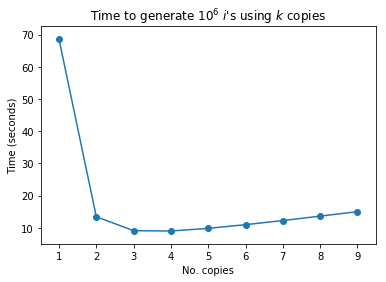

In [50]:
import numpy as np
import matplotlib.pyplot as plt

#Define the time function from above
def time(N, k, t_d = 0.5, t_c = 1, r = 30):
    return t_d + k*(t_d + t_c - 1/r) + (k+1)*N**(1/(k+1))/r

#Plot the time as a function of k
copies = np.arange(1,10)
times = time(10**6, copies)
plt.plot(copies,times)
plt.scatter(copies,times)
plt.title("Time to generate $10^6$ $i$'s using $k$ copies")
plt.ylabel('Time (seconds)')
plt.xlabel('No. copies')
plt.show()

### Discussion

From the plot above, we see 3-4 copies is the optimal amount for $N = 10^6$, which takes approximately 9 seconds to produce given the parameters above. With three copies, we will create $10^\frac{6}{4} \approx 32$ $i$'s originally, then copy and paste them 32 times (we now have 1024), and so on two more times. With four copies, we will create $10^\frac{6}{5} \approx 16$ $i$'s in the first go, and paste 16 times after each copy.

Given that we will repeat each operation (generating $i$'s or pasting copies) at least 16 times, it is faster to hold keys down rather than press them individually: the time to generate 16 characters via press and hold is $0.5 + 16/30 = 1.03$ seconds, whereas it would take $16/5 = 3.2$ seconds to generate that many characters via individual presses. Therefore it appears we have not lost anything by restricting ourselves to press and hold strategies.

### Addendeum: Optimal $k$

In this section we find the optimal number of copies, $k$, for a given $N$. Consider the continuous version of this problem:

$$ \min_k \left\{t_d + k\left(t_d + t_c - \frac{1}{r}\right) + (k+1)\frac{N^\frac{1}{k+1}}{r} \right\}$$

The first-order condition for the minimization problem is:

$$ t_d + t_c - \frac{1}{r} + \frac{N^\frac{1}{k+1}}{r} - \log(N)\frac{N^\frac{1}{k+1}}{(k+1)r} = 0 $$ 

Making the substitution $x = t_d + t_c - \frac{1}{r}$ and $y = N^\frac{1}{k+1}$ gives

$$ rx + y - y\log(y) = 0 $$

This equation has the following solution:

$$ y = \frac{rx}{W\left(\frac{rx}{e}\right)}, $$
where $W(\cdot)$ is the <a href = "https://en.wikipedia.org/wiki/Lambert_W_function"> *Lambert W function* </a>, which is the inverse of $xe^x$ (this function is surprisingly common). Recalling $y = N^\frac{1}{k+1}$, we can solve for $k$:

$$k + 1 = \frac{\log(N)}{\log\left(\frac{rx}{W\left(\frac{rx}{e}\right)}\right)} $$

This has an interesting implication: the number of $i$'s we type initially is given by $N^\frac{1}{k+1}$, which we saw above is equal to $\frac{rx}{W\left(\frac{rx}{e}\right)} \approx 21.3$. So the number of $i$'s we enter initially is independent of $N$ (setting aside the issues that $k$ and the number of keystrokes must be integer-valued).

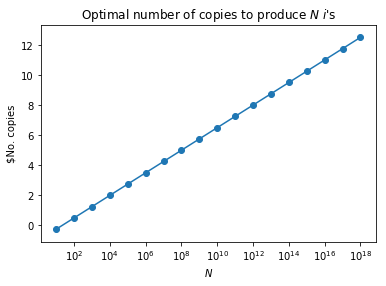

In [76]:
from scipy.special import lambertw

def optimal_k(N, t_d = 0.5, t_c = 1, r = 30):
    x = t_d + t_c - 1/r
    arg = r*x/lambertw(r*x/np.e)
    return np.log(N)/np.log(arg).real - 1

exps = np.linspace(1,18,18)
plt.plot(10**exps,optimal_k(10**exps))
plt.scatter(10**exps,optimal_k(10**exps))
plt.semilogx()
plt.title("Optimal number of copies to produce $N$ $i$'s")
plt.xlabel('$N$')
plt.ylabel('No. copies')
plt.show()